# Notas en aceleradores de gradiente

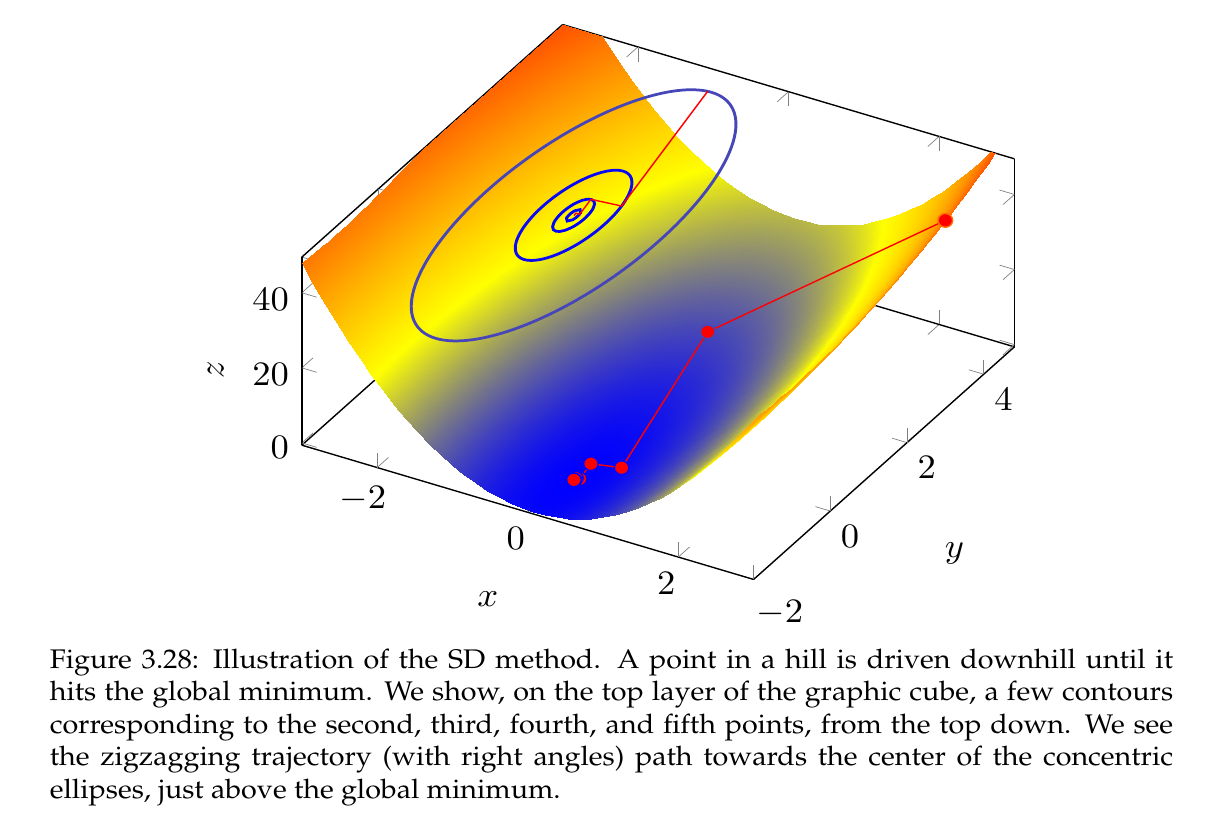

En la clase de ML hablamos de los metodos de gradiente y mostramos, por ejemplo
* Steeepest Descent (analitico) (funciones de costo cuadráticas), el gradiente es lineal.
* Conjugate Gradient (analitico). Funcion de costo cuadratica con gradiente lineal.
* Minibach/Stochastic/Batch.
Hablamos del paso $\eta$ y muchas otra cosas.

En la clase de hoy nos enfocamos a metodos que **aceleren** la convergencia el gradiente.

Recuerden que

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla C(\theta^{(i)}) $$

La idea en clase de hoy (y la que sigue) es buscar $\eta$ que me **acelere** la convergencia.  A $\eta$ lo conocemos como el paso, learning parameter (parametro de aprendizaje).



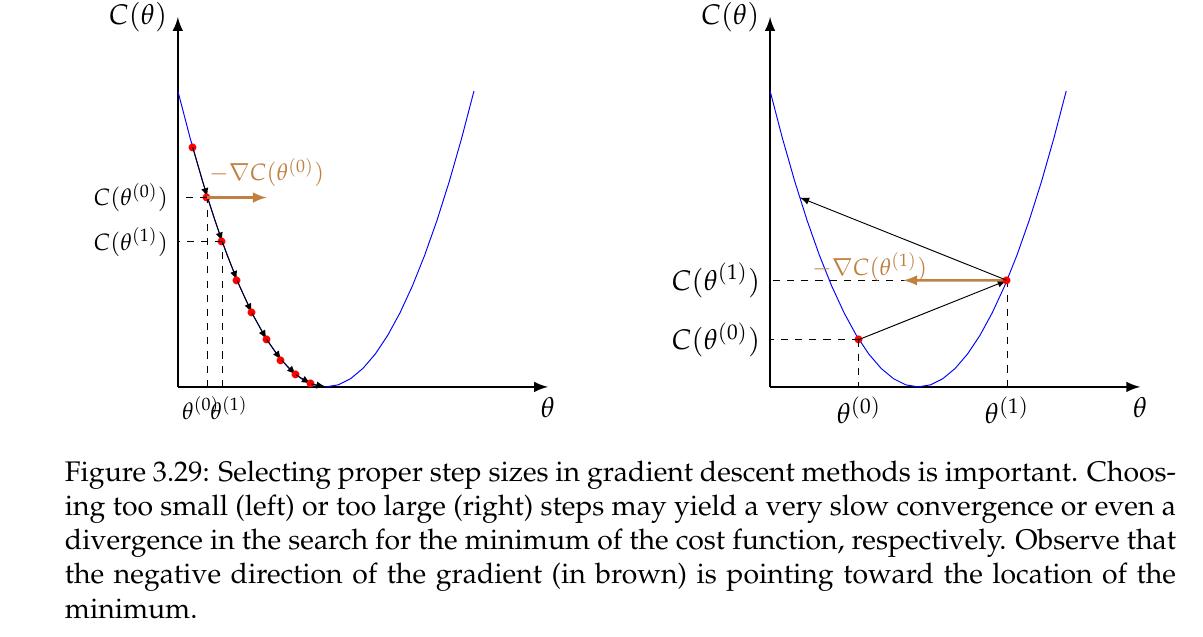

El tamano de $\eta$ es muy importante:

* Si es muy pequeno, hay mas probabilidad de convergencia, pero muy lenta. (Figura 3.29 izquierda)
* Si es muy grande, si converge es muy rapido pero hay alta probabilidad de divergencia. (Figtura 3.29 derecha).

La siguiente figura 3.30 ilustra otro ejemplo donde el tamano de $\eta$ juega un papel muy importante.

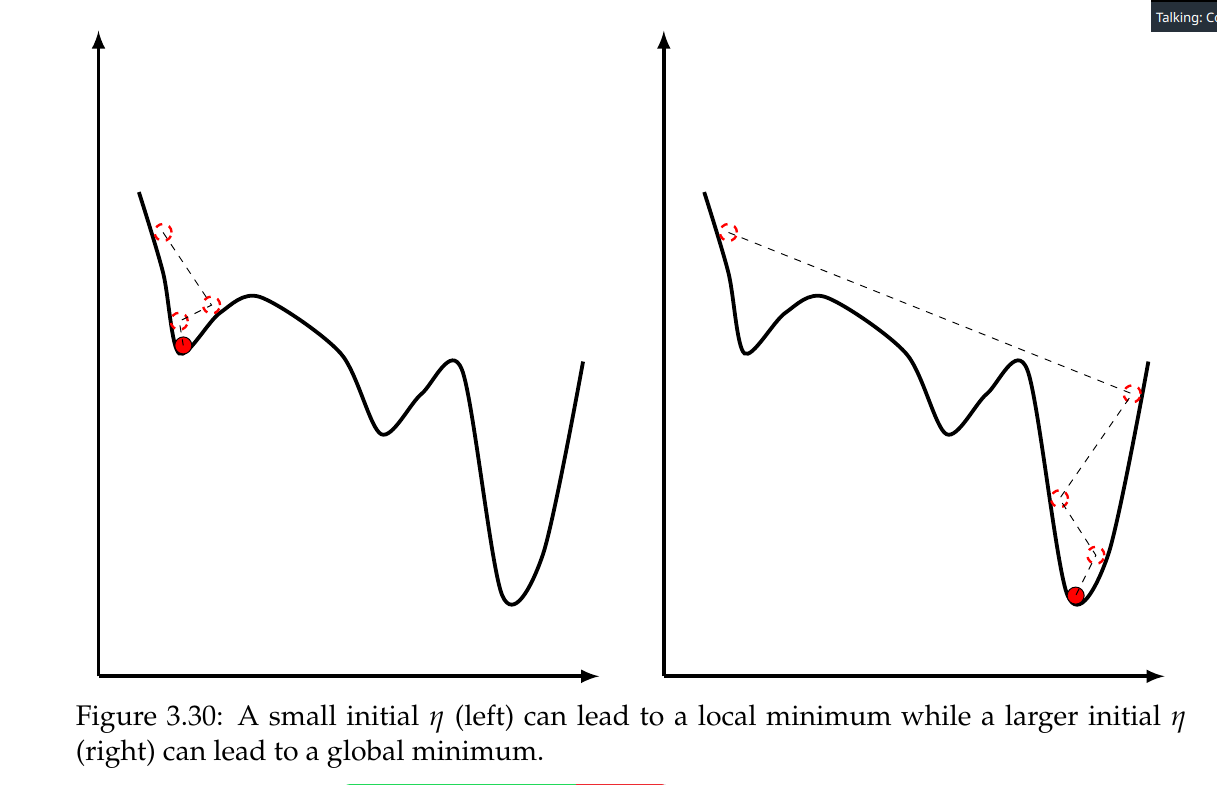

La ultima Figura donde el tamano de eta se discute es la Figura 3.31.
Vemos que el $\eta$ puede generar divergencia si es muy grande.


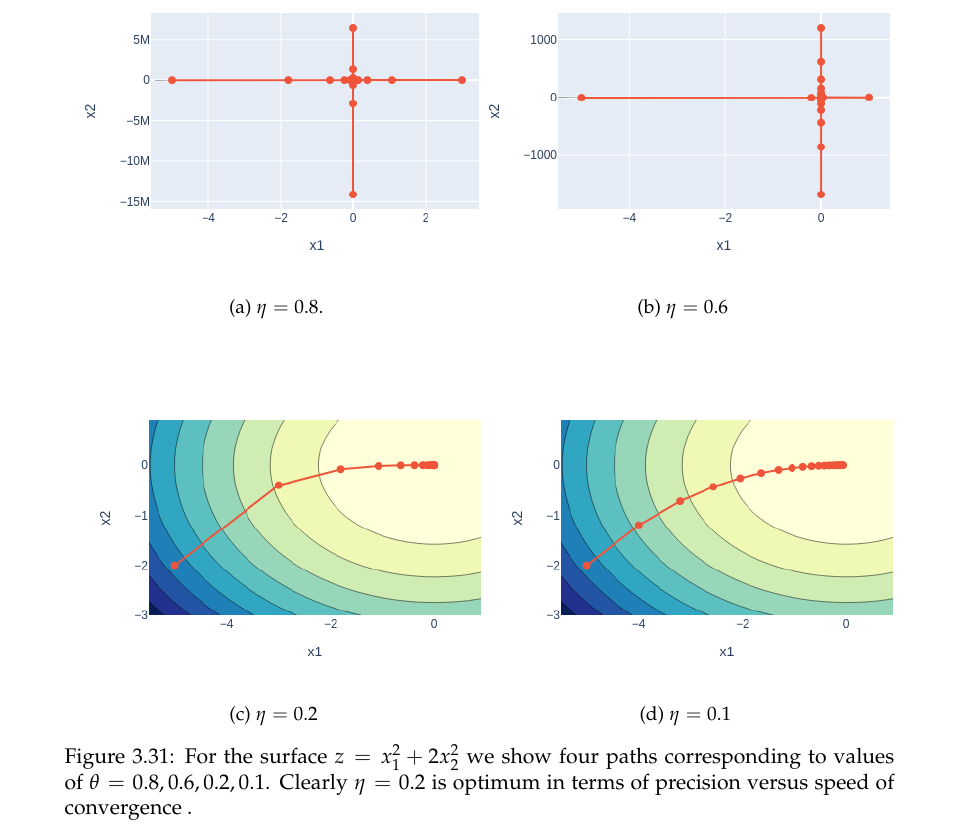

La Figura 3.31 muestra los contornos (curvas de nivel) de una paraboloide eliptica $z = x_1² + 2 x_2²$. (vanishing gradient=gradiente muy pequenho).



## Tecnicas de aceleracion de gradiente.

Recordemos el minibatch gradient descent.

$$g^{(i)} = \frac1n \sum_{j \in B_i} \nabla C_j(\theta) $$

### Metodo del momento (momentum).
Lo invento el ruso Poliak en 1964 (referencia en las notas de clase).
Para explicar este método me voy a basar en una ecuación que me genera elipses elongadas.

$$z = 0.1 x_1^2 + 2 x_2^2$$
$$z =  \frac{x_1^2}{1/0.1}  +  \frac{x_2^2}{1/2}$$
$$z =  \frac{x_1^2}{ ( \sqrt{10})² }  +  \frac{x_2^2}{(\sqrt{1/4}})^2$$


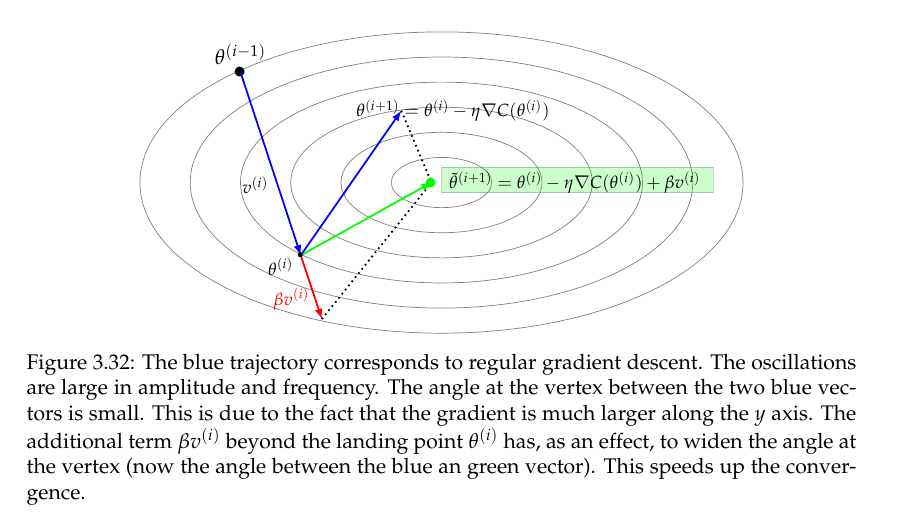

El gradiente tipico es

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla C(\theta^{(i)})  $$

El momento consiste en agregarle a $\theta^{(i)}$ una distancia en la direccion del gradiente $v^{(i)}$ pesada con un peso $\beta$, y estamos en la Figura 3.32 en la punta del vector rojo. De ahi sumamos el gradiente en el punto $\theta^{(i)}$. La matematica es

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla C(\theta^{(i)}) + \beta v^{(i)} $$

Voy a usar la notacion $g$ en vez de $C$

$$\theta^{(i+1)} = \theta^{(i)} - \eta g^{(i)} + \beta v^{(i)}. $$

Esta ecuacion se puede escribir  como dos ecuaciones

$$v^{(i+1)} = \beta v^{(i)} - \eta g^{(i)}  $$
$$\theta^{(i+1)} = \theta^{(i)} + v^{(i+1)}. $$

Otra forma es la siguiente (es la que uso Poliak en su ecuacion (9).

Polik observa que $v^{(i)} = \theta^{(i)} - \theta^{(i-1)} $ entonces
escribe

$$\theta^{(i+1)} = \theta^{(i)} - \eta g^{(i)} + \beta (\theta^{(i)}-\theta^{(i-1)}). $$

La Figura 3.33 observa las trayectorias del metodo regular del descenso de gradiente versus el de momentum.


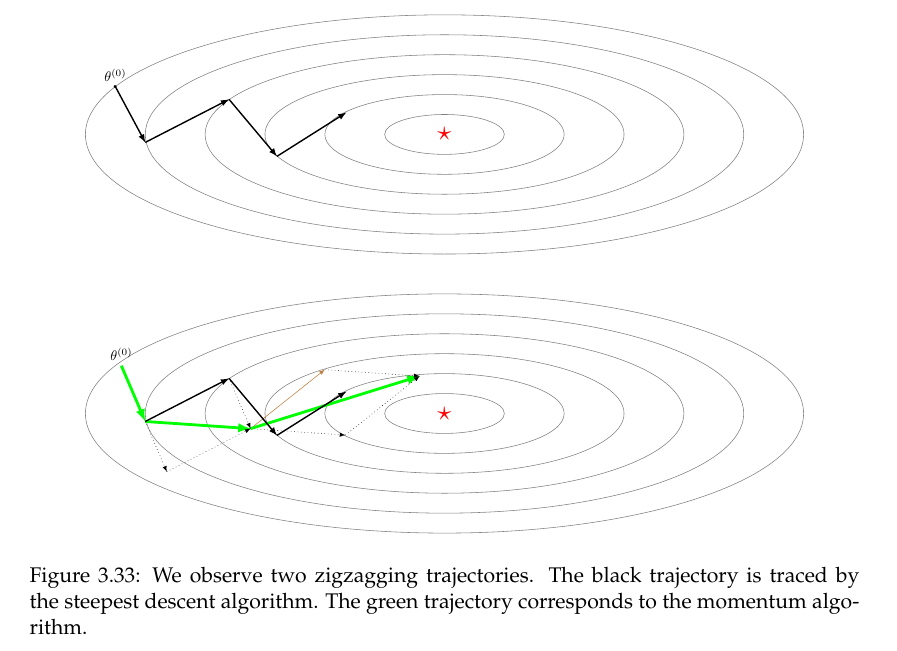

Otra forma de ver el algoritmo de Poliak es

\begin{eqnarray}
v^{(i)} &=& \beta v^{(i-1)} + (1 - \beta) g^{(i)} \\
\theta^{(i)} &=& \theta^{(i-1)} - \eta v^{(i)}
\end{eqnarray}
Como llegar a esta ecuacion a partir de las ecuaciones de arriba.

Observemos que
1. Si $\beta=0$:  Obtenemos el gradiente tradicional.
2. Si $\beta=1$: no hay convergencia. $v^{(i)} = v^{(i-1)}$
Un valor tipico puede ser $\beta=0.5$. Regularmente $\theta \in (0,1)$.
Tipicamente $\beta = [0.8, 0.99]$.

El algoritmo se presenta en la siguiente hoja.

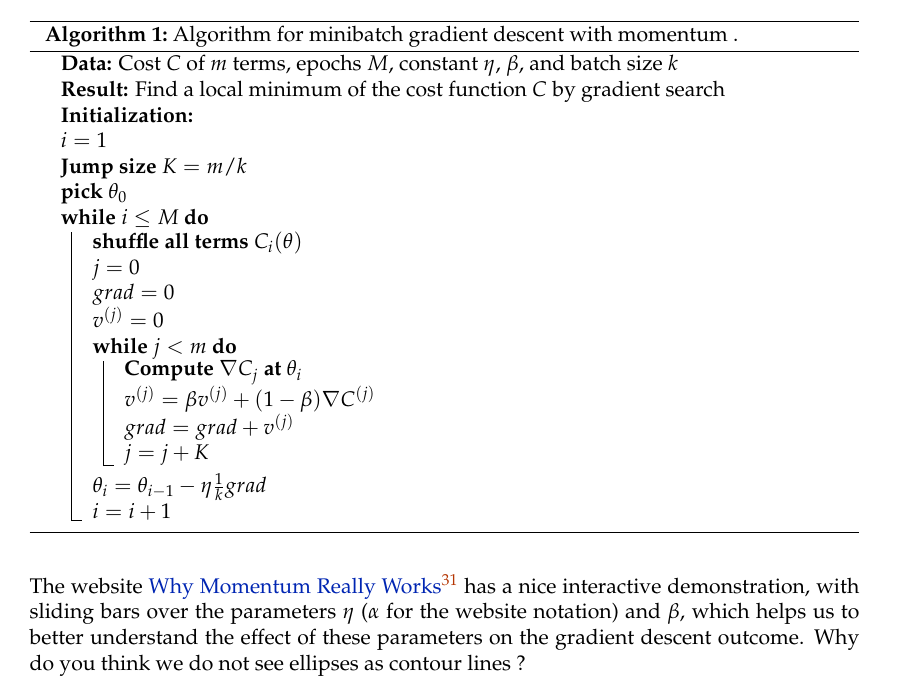

El sitio [Why Momentum Really Works](https://distill.pub/2017/momentum/) ilustra un juego donde los parametros $\alpha$ (acá es $\eta$) y $\beta$ se pueden manipular para acelerar la convergencia (o hacerla mas lenta o intestable).

Hands on example.

Pensemos simple, $f(x)=x^4$.
El gradiente es $4 x^3$. No vamos mirar curvas de nivel por que para funciones $f: A \subset \mathbb{R} \to \mathbb{R}$ las curvas de nivel son **puntos** de nivel. El concepto no tiene sentido.

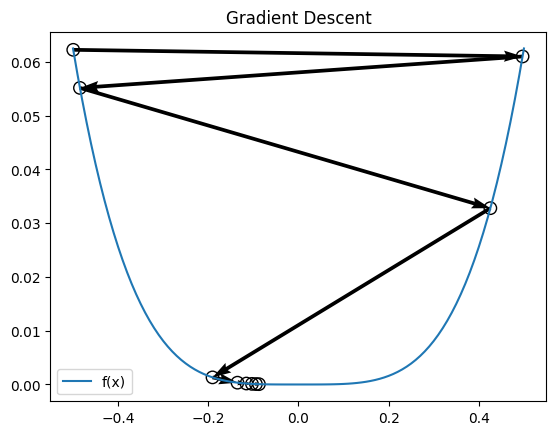

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# funcion facil
def f(x):
    return x**4

# gradiente de funcion facil
def gradf(x):
    return 4*x**3

# eta: hard coded
eta = 1.999 # jugamos con esto, eta=0.1 es interesante
# eta = 0.5 # jugamos con esto, eta=0.1 es interesante
eps = 10**(-6)

# punto inicial
x = 0.5

# lista con los puntos
xlist  = []
ylist  = []
gradList = []

M = 10 # 10 epocas

for i in range(M):
    x = x - eta*gradf(x)
    xlist.append(x)
    ylist.append(f(x))
    gradList.append(gradf(x))

# cast list into a numpy array
xarr = np.array(xlist)
yarr = np.array(ylist)
gradarr = np.array(gradList)

xdomain = np.arange(-0.5, 0.51, 0.01)
ydomain = f(xdomain)

# graph the function f
plt.title("Gradient Descent")
plt.plot(xdomain, ydomain, label = "f(x)")

# quiver plot for the xarr, yarr
plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1], \
    scale_units = 'xy' , angles = 'xy' , scale = 1)

plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k')
plt.legend()
plt.show()




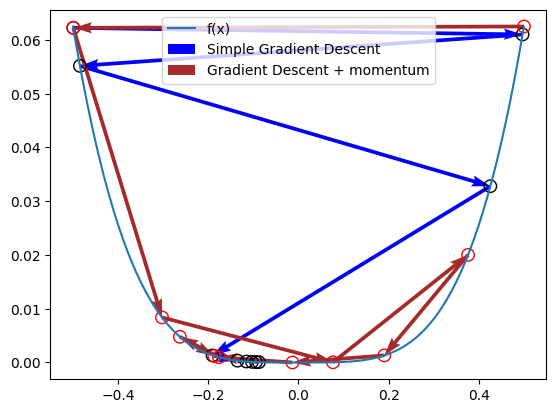

In [ ]:
# descender con momentum
beta = 0.8

# punto inicial
x = 0.5

xlist2 = []
ylist2 = []
gradList2 = []

for i in range(M):
    xlist2.append(x)
    ylist2.append(f(x))
    gradList2.append(gradf(x))
    x = x - eta*gradf(x) + beta*(xlist2[i] - xlist2[i-1])

xdomain = np.arange(-0.5, 0.51, 0.01)
ydomain = f(xdomain)
xarr2 = np.array(xlist2)
yarr2 = np.array(ylist2)
gradarr2 = np.array(gradList2)

# plot the function
plt.plot(xdomain, ydomain, label = "f(x)")

plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1], \
    scale_units = 'xy' , angles = 'xy' , scale = 1, color="blue",
            label="Simple Gradient Descent")







# quiver plot for the xarr, yarr
plt.quiver( xarr2[:-1], yarr2[:-1], xarr2[1:]-xarr2[:-1], yarr2[1:] - yarr2[:-1], \
    scale_units = 'xy' , angles = 'xy' , scale = 1, color="brown", label="Gradient Descent + momentum")

# scatter plot
plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k')
plt.scatter(xlist2, ylist2, s=80, facecolors='none', edgecolors='r')
plt.legend()
plt.show()



8:01

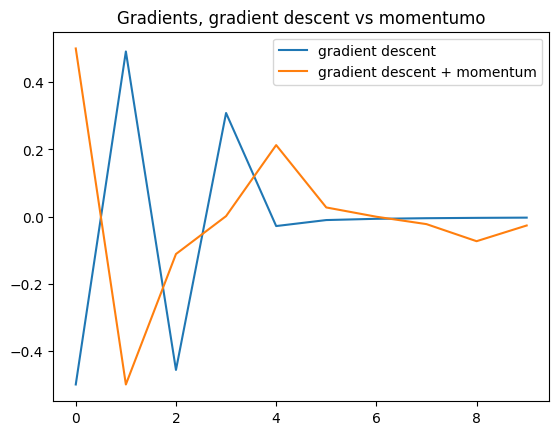

In [ ]:
# graficamos los gradientes
plt.title("Gradients, gradient descent vs momentumo")
plt.plot(gradList, label="gradient descent")
plt.plot(gradList2, label="gradient descent + momentum")
plt.legend()
plt.show()

### Version 2 del momentum
$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla f(\theta^{(i)}) + \beta \nabla f(\theta^{(i)}) $$
Que pasa si $\beta = \eta$.

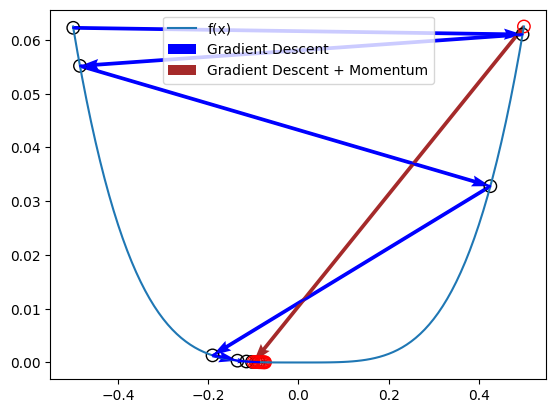

In [ ]:
beta = 0.8

# punto inicial
x = 0.5
# lo que llamamos theta en las notas es x aca.

# lista de puntos
xlist2 = []
ylist2 = []
gradList2 = []

for i in range(M):
    xlist2.append(x)
    ylist2.append(f(x))
    gradList2.append(gradf(x))
    x = x - eta*gradf(x) + beta*gradf(x)

xdomain = np.arange(-0.5, 0.51, 0.01)
ydomain = f(xdomain)
xarr2 = np.array(xlist2)
yarr2 = np.array(ylist2)
gradarr2 = np.array(gradList2)

# graph f
plt.plot(xdomain, ydomain, label = "f(x)")

# plot quiver xarr, yarr
plt.quiver( xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1], \
    scale_units = 'xy' , angles = 'xy' , scale = 1, label="Gradient Descent", color="blue")

plt.plot(xlist, ylist, color='blue')

plt.quiver(xarr2[:-1], yarr2[:-1], xarr2[1:]-xarr2[:-1], yarr2[1:] - yarr2[:-1],
           scale_units = 'xy', angles = 'xy', scale = 1, label="Gradient Descent + Momentum", color="brown")

# scatter plot
plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k')
plt.scatter(xlist2, ylist2, s=80, facecolors='none', edgecolors='r')
plt.legend()
plt.show()

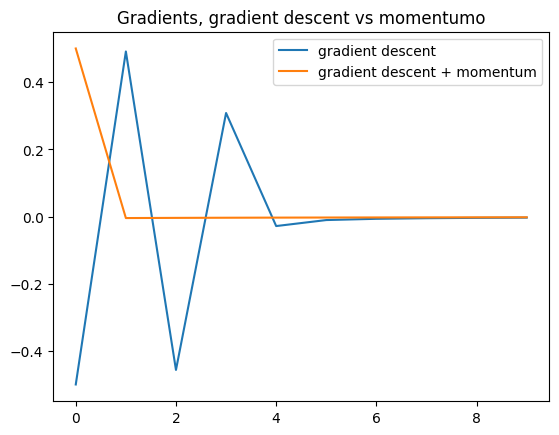

In [ ]:
# graficamos los gradientes
plt.title("Gradients, gradient descent vs momentumo")
plt.plot(gradList, label="gradient descent")
plt.plot(gradList2, label="gradient descent + momentum")
plt.legend()
plt.show()

### Momentum 3ra version
\begin{eqnarray}
v^{(k)} &=& \beta v^{(k-1)} + (1 - \beta) g^{(k)} \\
\theta^{(k)} &=& \theta^{(k-1)} - \eta v^{(k)}
\end{eqnarray}

Que pasa si $\beta=1$?

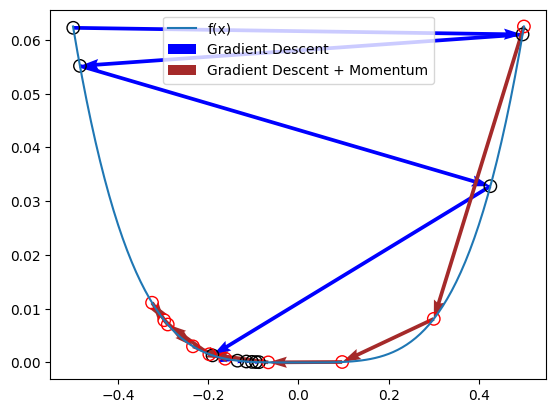

In [ ]:
beta = 0.8

# punto inicial
x = 0.5

# list of points
xlist2 = []
ylist2 = []
gradList2 = []
v=0

for i in range(M):
    xlist2.append(x)
    ylist2.append(f(x))
    gradList2.append(gradf(x))
    v = beta*v + (1-beta)*gradf(x)
    x = x - eta*v

# plot the graph of f
xdomain = np.arange(-0.5, 0.51, 0.01)
ydomain = f(xdomain)
plt.plot(xdomain,ydomain, label="f(x)")

# plt quiver for xarr, yarr
plt.quiver(xarr[:-1], yarr[:-1], xarr[1:]-xarr[:-1], yarr[1:] - yarr[:-1], \
           scale_units = 'xy', angles='xy', scale=1, color='blue', label="Gradient Descent")

# cast lis2 into np arrays
xarr2 = np.array(xlist2)
yarr2 = np.array(ylist2)
gradarr2 = np.array(gradList2)

# plot quiver xarr2, yarr2
plt.quiver(xarr2[:-1], yarr2[:-1], xarr2[1:]-xarr2[:-1], yarr2[1:] - yarr2[:-1], \
           scale_units='xy',   angles = 'xy', scale=1, color='brown', label="Gradient Descent + Momentum")

# scatter plots
plt.scatter(xlist, ylist, s=80, facecolors='none', edgecolors='k')
plt.scatter(xlist2, ylist2, s=80, facecolors='none', edgecolors='r')
plt.legend()
plt.show()

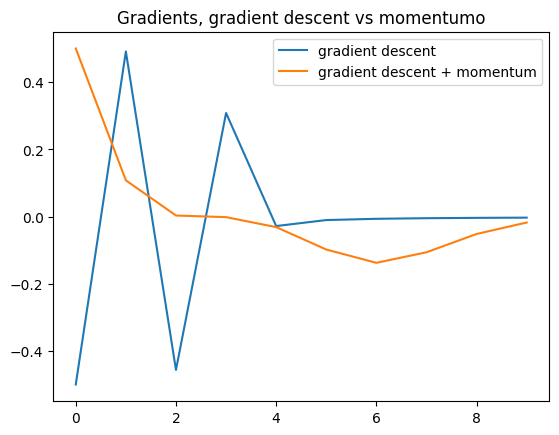

In [ ]:
# plot the gradients
plt.title("Gradients, gradient descent vs momentumo")
plt.plot(gradList, label="gradient descent")
plt.plot(gradList2, label="gradient descent + momentum")
plt.legend()
plt.show()

### Metodo de Nesterov.
Nesterov (Yurii Nesterov, estudiante de Poliak), 1983 (referencias en las notas de clase).

La idea de Nesterov es calcular el gradiente, no en $\theta^{(i)}$ si no un paso mas alla ($\theta^{(i+1)})$. La Figura 3.14 ilustra el método.

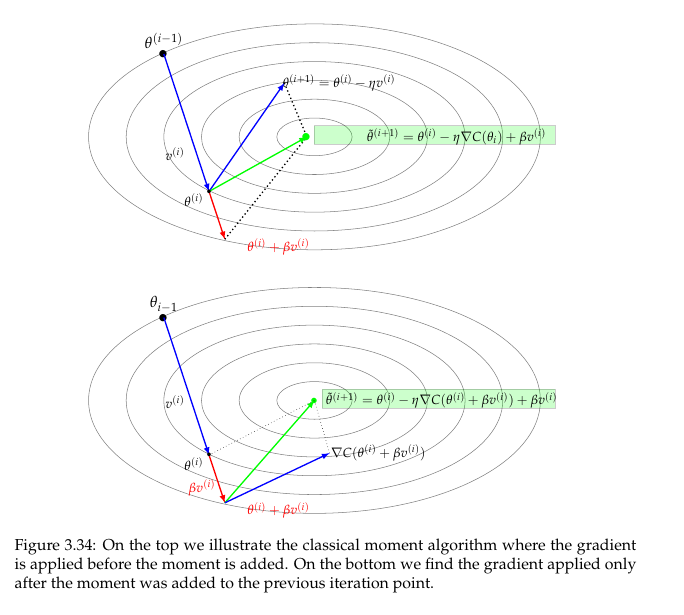

La idea se resume en la proxima ecuación

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla C( \theta^{(i)} + \beta v^{(i)}) + \beta v^{(i)}.  \tag{1} $$

En siglas este metodo se conoce como NAG (Nesterov Accelerator Gradient).

Otra forma de ver la Ecuación

\begin{eqnarray}
v^{(i+1)} &=& \beta v^{(i)} - \eta g^{(i)} (\theta^{(i)} + \beta v^{(i)}) \\
\theta^{(i+1)} &=& \theta^{(i)} + v^{(i+1)}.
\end{eqnarray}

Ilya Sutskever (y amigos) hicieron un análisis cuantativo comparando el método del momento con el the NAG. Encontraron que ambos método difieren básicamente cuando $\eta$ es relativamente grande. Para $\eta$ pequeño ambos son muy parecidos.  Nesterov afirma que su metodo es más rapido que el de Poliak.
Dejamos como tarea implementar el ejemplo juguete $f(x)=x^4$ al estudiante.
Y compara para varios $\eta$ el desempeño de ambos.

El problema que presentan los métodos de Poliak (momentum) y NAG es que necesita dos hiper-parámetros $\eta, \beta$.

Introducimos el método de AdaGrad (Adaptive).

### AdaGrad (Adaptive Gradient).
La idea del AdaGrad es usar un solo parámetro $\eta$ pero que no sea constante sino función de la iteración (no es estacionario).

$$\theta^{(i+1)} = \theta^{(i)} - \eta^{(i)} g^{(i)} $$

Vamods a motivar la introducción del método de AdaGrad con un ejemplo.
Considere la cuadrática

$$f(x) = \frac12 x^T A x - b^T x + c \quad, \quad x \in \mathbb{R}^n \quad , \quad A \in \mathbb{R}^{n \times n} \quad , \quad c \in \mathbb{R} $$
Asumimos que $A$ es simetrica positiva definida.

Recuerden el teorema espectral de ML. Existe una matriz ortogonal $Q$ tal que

$$A = Q \Lambda Q^T $$
donde $\Lambda$ es una matriz diagonal con los autovalores de $A$ en la diagonal.
El siguiente cambio de variable simplifica la ecuacion grandemente

$$x'= Q^T x \quad , \quad  x = Q x' \quad ,  \quad x'^T = x^T Q $$
Entonces

$$f(x´) = \frac12 x^T Q \Lambda Q^T - b^T x + c = \frac12 x'^T \Lambda x'- b^T Q x'+ c. $$

El gradiente esta dado por

$$\nabla f(x´) = \Lambda x' - Q^T b $$
$Q^T b$ es constante (no depende de $x´$ y entonces la ecuacion está gobernada por $\Lambda$.
El número de condición (condition number) está dado por

$$\kappa = \frac{\lambda_{max}}{\lambda_{min}} $$
si $\kappa=1$ la matriz es ortogonal, los contornos son esféricos y la convergencia se da en un paso.
En general, el número de condición es $>1$.














**Ejemplo 3.4.1**: Observe la Figura 3.35. Las curvas de nivel corresponden a la ecuación

$$f(x_1, x_2) = \frac{x_1^2}{9} + x_2^2 = \frac12 \left ( \frac{2 x_1^2}{9} + 2 x_2^2  \right )  = \frac12 ( x_1  \quad x_2)  \begin{pmatrix}
2/9 & 0 \\ 0 & 2
\end{pmatrix} \binom{x_1}{x_2} $$

i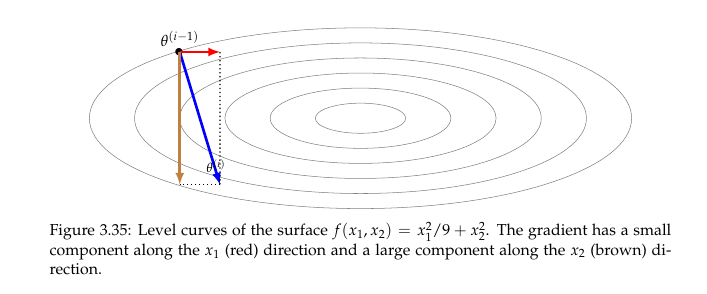

Calculamos el gradiente de $f$

$$\nabla f(x_1, x_2) = 2 \left ( \frac{x_1}{9} ,  x_2 \right )  $$
Calculamos el gradiente en el punto $(-2, 2.2)$ punto negro en la gráfica.

$$\nabla f ( -2, 2.2) = (-0.444, 4.4) $$

El negativo de este gradiente es

$$-\nabla f ( -2, 2.2) = (0.444, -4.4) $$
Representado por la flecha azul.

El problema es que la componente vertical es mucho mas grande que la horizontal (10 veces?) y esto presenta inestabilidad.

La idea del AdaGrad es **compensar** esta diferencia en los tamaños de las componentes.

El método construye

$$\eta^{(i)} = \frac{\eta}{\sqrt{G^{(i)} + \epsilon}} $$
donde

$$G^{(i)} = \sum_{j=1}^i g^{(j)} \circ g^{(j)} $$
el $\epsilon >0$ es un número pequeño que ayuda a estabilizar la division (evitar división por cero).

Cada $\eta^{(i)}$ es un vector

$$\eta_k^{(i)} = \frac{\eta}{\sqrt{G_k^{(i)} + \epsilon}} $$

Veamos el problema de otra forma para entenderlo mejor.
$g$ es una matriz, por que $g$ depende de la iteración $i$ y de sus componentes que son las derivadas parciales. Explícitamente

$$g = (g_k^{(i)}) = \begin{pmatrix}
g_1^{(1)} & g_2^{(1)} & \cdots & g_n^{(1)} \\
g_1^{(2)} & g_2^{(2)} & \cdots & g_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
g_1^{(m)} & g_2^{(m)} & \cdots & g_n^{(m)} \\
\end{pmatrix} $$
con $k=1,2 \cdots, n$, $i=1,2, \cdots, m$

Recuerden que cada componente esta dada por

$$g_k^{(i)} = \frac{\partial C}{\partial \theta_k^{(i)}} $$

* $g_k$ es una columna de $g$ es una componente fija del gradiente.
* $g^{(i)}$ es una fila el gradiente a lo largo de cada iteración

El método estima $\theta^{(i)}$.

$$\theta^{(i)} = \theta^{(i-1)} - \eta^{(i)} \circ g^{(i)} $$

#### Intuición del AdaGrad.

* El parámetro $\eta^{(i)}$ se ajusta dinámicamente para cada componente del gradiente.

* Las componentes grandes se penalizacn al dividir or una historia de $G^{(i)}$ grande. Las pequeñas se amplifican.


**Interpretación geométrica**:

* La función de costo tiene componentes en el gradiente **desbalanceadas**. El método de AdaGrad normaliza las actuacizaciones, para hacer ver el problema como que todas las componentes son uniformes.

* La **historia** ayuda a suavizar y mejorar la estabilidad numérica.
Recuerde que la intestabilidad está asociada a números de condición grandes y esto a su vez representa elipses achatadas.

Puede haber un problema. A lo último el gradiente puede perder mucho tamaño, pues la historia acumulada suma. Y esto produce el efecto de **vanishing gradient**.

Si el gradiente es muy pequeño entones que $\nabla C(\theta_i) \approx 0$
entonces

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla C(\theta_i) \approx \theta^{(i)} $$
no estamos avanzando de $i$ a $i+1$, el sistema **deja de aprender**.

# Proxima clase:
* AdaDelta
* RMSProp
* Adam

Funciones de costo.